In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("="*70)
print("DECISION TREE AND RANDOM FOREST CLASSIFICATION")
print("="*70)

DECISION TREE AND RANDOM FOREST CLASSIFICATION


In [2]:
print("\n[1] LOADING DATA...")
df = pd.read_csv('Lab Results.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {df.shape[0]}")
print(f"\nColumn Names:\n{df.columns.tolist()}")
print(f"\nFirst 5 rows:\n{df.head()}")
print(f"\nData Types:\n{df.dtypes}")
print(f"\nMissing Values:\n{df.isnull().sum()}")
print(f"\nBasic Statistics:\n{df.describe()}")

# Check target distribution
print(f"\nTarget Variable Distribution:")
print(df['SOURCE'].value_counts())
print(f"\nTarget Percentage:")
print(df['SOURCE'].value_counts(normalize=True) * 100)



[1] LOADING DATA...

Dataset Shape: (4412, 11)
Total Records: 4412

Column Names:
['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE']

First 5 rows:
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         35.1          11.8         4.65        6.3          310  25.4  33.6   
1         43.5          14.8         5.39       12.7          334  27.5  34.0   
2         33.5          11.3         4.74       13.2          305  23.8  33.7   
3         39.1          13.7         4.98       10.5          366  27.5  35.0   
4         30.9           9.9         4.23       22.1          333  23.4  32.0   

    MCV  AGE SEX SOURCE  
0  75.5    1   F    out  
1  80.7    1   F    out  
2  70.7    1   F    out  
3  78.5    1   F    out  
4  73.0    1   M    out  

Data Types:
HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH  

In [3]:
print("\n[2] DATA PREPROCESSING...")

# Encode categorical variables
le_sex = LabelEncoder()
le_source = LabelEncoder()

df['SEX_ENCODED'] = le_sex.fit_transform(df['SEX'])
df['SOURCE_ENCODED'] = le_source.fit_transform(df['SOURCE'])

print(f"\nSEX Encoding: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"SOURCE Encoding: {dict(zip(le_source.classes_, le_source.transform(le_source.classes_)))}")

# Separate features and target
X = df[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
        'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX_ENCODED']]
y = df['SOURCE_ENCODED']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print("\n✓ Data preprocessing completed")


[2] DATA PREPROCESSING...

SEX Encoding: {'F': np.int64(0), 'M': np.int64(1)}
SOURCE Encoding: {'in': np.int64(0), 'out': np.int64(1)}

Features shape: (4412, 10)
Target shape: (4412,)

Training set: (3529, 10)
Testing set: (883, 10)

✓ Data preprocessing completed


In [4]:
print("\n" + "="*70)
print("[3] DECISION TREE MODEL")
print("="*70)

# Hyperparameter tuning for Decision Tree
print("\nPerforming hyperparameter tuning...")
dt_param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       dt_param_grid, cv=5, scoring='accuracy',
                       n_jobs=-1, verbose=0)
dt_grid.fit(X_train, y_train)

print(f"\nBest Parameters: {dt_grid.best_params_}")
print(f"Best CV Score: {dt_grid.best_score_:.4f}")

# Train Decision Tree with optimal parameters
dt_model = dt_grid.best_estimator_
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("\n--- Decision Tree Results ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt,
                          target_names=['out', 'in']))

print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"\nCross-Validation Scores: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std():.4f})")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_dt)

# Tree depth and node information
print(f"\nTree Depth: {dt_model.get_depth()}")
print(f"Number of Leaves: {dt_model.get_n_leaves()}")



[3] DECISION TREE MODEL

Performing hyperparameter tuning...

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score: 0.7319

--- Decision Tree Results ---

Accuracy: 0.7271
Precision: 0.7436
Recall: 0.8270
F1-Score: 0.7831
ROC-AUC Score: 0.7644

Classification Report:
              precision    recall  f1-score   support

         out       0.69      0.58      0.63       357
          in       0.74      0.83      0.78       526

    accuracy                           0.73       883
   macro avg       0.72      0.70      0.71       883
weighted avg       0.72      0.73      0.72       883


Confusion Matrix:
[[207 150]
 [ 91 435]]

Cross-Validation Scores: [0.71388102 0.73654391 0.75354108 0.71954674 0.73617021]
Mean CV Score: 0.7319 (+/- 0.0140)

Feature Importance:
        Feature  Importance
4   THROMBOCYTE    0.434990
0   HAEMATOCRIT    0.240348
3     LEUCOCYTE    0.117663
8           AGE    0.072584
5           MCH    0

In [5]:
print("\n" + "="*70)
print("[4] RANDOM FOREST MODEL")
print("="*70)

# Hyperparameter tuning for Random Forest
print("\nPerforming hyperparameter tuning...")
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                       rf_param_grid, cv=5, scoring='accuracy',
                       n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)

print(f"\nBest Parameters: {rf_grid.best_params_}")
print(f"Best CV Score: {rf_grid.best_score_:.4f}")

# Train Random Forest with optimal parameters
rf_model = rf_grid.best_estimator_
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("\n--- Random Forest Results ---")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf,
                          target_names=['out', 'in']))

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"\nCross-Validation Scores: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std():.4f})")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_rf)

print(f"\nNumber of Trees: {rf_model.n_estimators}")
print(f"Out-of-Bag Score: {rf_model.oob_score_ if hasattr(rf_model, 'oob_score_') else 'N/A'}")


[4] RANDOM FOREST MODEL

Performing hyperparameter tuning...

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Score: 0.7526

--- Random Forest Results ---

Accuracy: 0.7441
Precision: 0.7669
Recall: 0.8194
F1-Score: 0.7923
ROC-AUC Score: 0.7970

Classification Report:
              precision    recall  f1-score   support

         out       0.70      0.63      0.67       357
          in       0.77      0.82      0.79       526

    accuracy                           0.74       883
   macro avg       0.74      0.73      0.73       883
weighted avg       0.74      0.74      0.74       883


Confusion Matrix:
[[226 131]
 [ 95 431]]

Cross-Validation Scores: [0.72379603 0.74362606 0.77053824 0.77195467 0.75319149]
Mean CV Score: 0.7526 (+/- 0.0179)

Feature Importance:
        Feature  Importance
4   THROMBOCYTE    0.238440
0   HAEMATOCRIT    0.119646
3     LEUCOCYTE    0.119635
2   ERYTHROCYTE    0.

In [6]:
print("\n" + "="*70)
print("[5] MODEL COMPARISON")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_dt),
                  precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_dt),
               recall_score(y_test, y_pred_rf)],
    'F1-Score': [f1_score(y_test, y_pred_dt),
                 f1_score(y_test, y_pred_rf)],
    'ROC-AUC': [roc_auc_score(y_test, y_pred_proba_dt),
                roc_auc_score(y_test, y_pred_proba_rf)]
})

print("\n", comparison_df.to_string(index=False))


[5] MODEL COMPARISON

         Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Decision Tree  0.727067   0.743590 0.826996  0.783078 0.764392
Random Forest  0.744054   0.766904 0.819392  0.792279 0.796980



[6] GENERATING VISUALIZATIONS...
✓ Visualizations saved as 'decision_tree_rf_results.png'


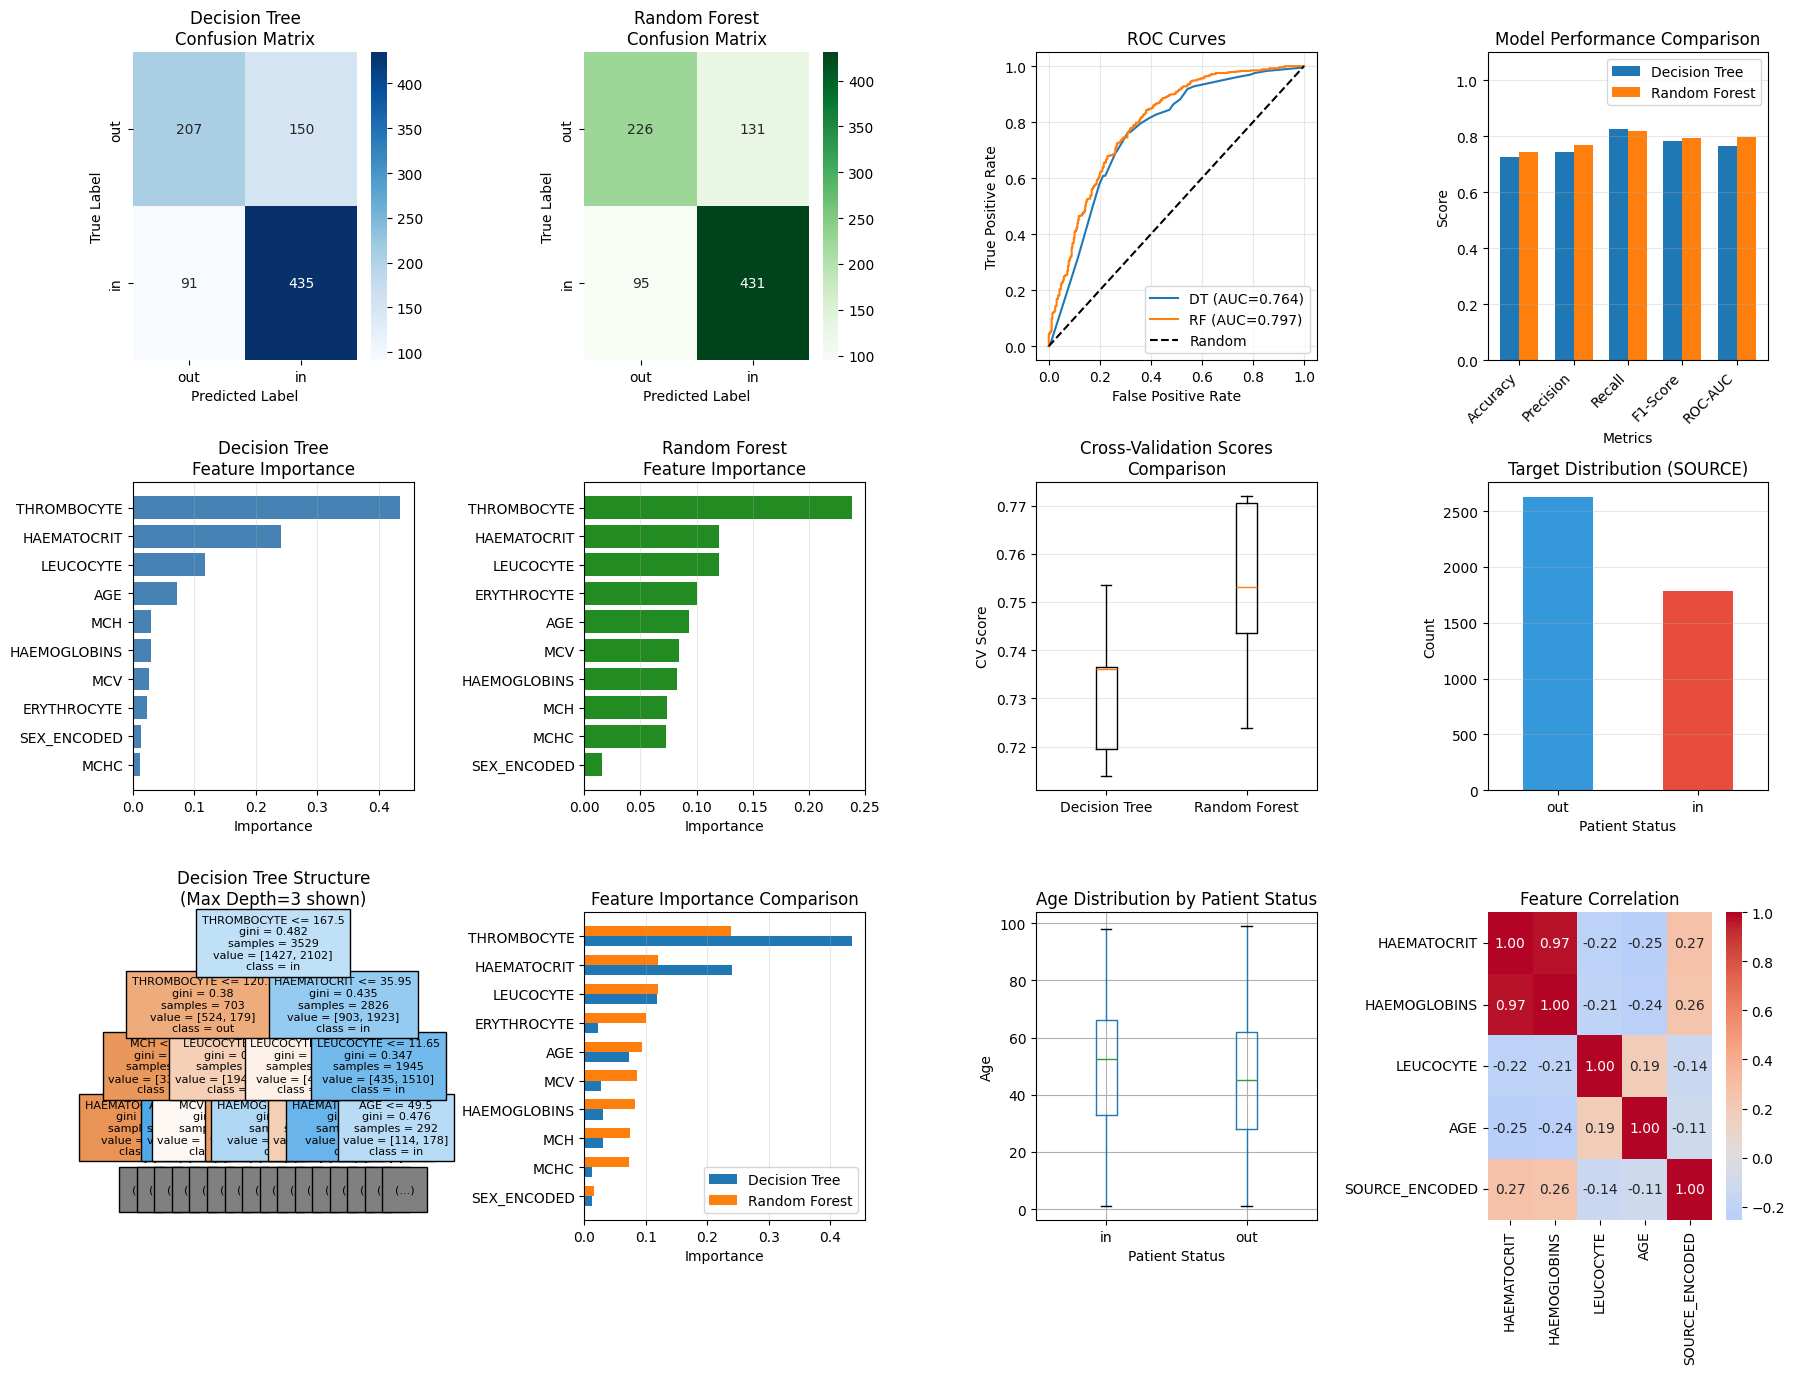

In [7]:
print("\n[6] GENERATING VISUALIZATIONS...")

# Create figure with subplots
fig = plt.figure(figsize=(18, 14))

# 1. Confusion Matrices
ax1 = plt.subplot(3, 4, 1)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['out', 'in'], yticklabels=['out', 'in'])
plt.title('Decision Tree\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

ax2 = plt.subplot(3, 4, 2)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['out', 'in'], yticklabels=['out', 'in'])
plt.title('Random Forest\nConfusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 2. ROC Curves
ax3 = plt.subplot(3, 4, 3)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_dt, tpr_dt, label=f'DT (AUC={roc_auc_score(y_test, y_pred_proba_dt):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC={roc_auc_score(y_test, y_pred_proba_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Model Comparison Bar Plot
ax4 = plt.subplot(3, 4, 4)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.35
plt.bar(x - width/2, comparison_df.iloc[0, 1:], width, label='Decision Tree')
plt.bar(x + width/2, comparison_df.iloc[1, 1:], width, label='Random Forest')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.ylim(0, 1.1)

# 4. Feature Importance (Decision Tree)
ax5 = plt.subplot(3, 4, 5)
feature_importance_dt_sorted = feature_importance_dt.sort_values('Importance')
plt.barh(feature_importance_dt_sorted['Feature'],
         feature_importance_dt_sorted['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Decision Tree\nFeature Importance')
plt.grid(True, alpha=0.3, axis='x')

# 5. Feature Importance (Random Forest)
ax6 = plt.subplot(3, 4, 6)
feature_importance_rf_sorted = feature_importance_rf.sort_values('Importance')
plt.barh(feature_importance_rf_sorted['Feature'],
         feature_importance_rf_sorted['Importance'], color='forestgreen')
plt.xlabel('Importance')
plt.title('Random Forest\nFeature Importance')
plt.grid(True, alpha=0.3, axis='x')

# 6. Cross-Validation Scores Comparison
ax7 = plt.subplot(3, 4, 7)
cv_data = [cv_scores_dt, cv_scores_rf]
labels = ['Decision Tree', 'Random Forest']
plt.boxplot(cv_data, labels=labels)
plt.ylabel('CV Score')
plt.title('Cross-Validation Scores\nComparison')
plt.grid(True, alpha=0.3, axis='y')

# 7. Target Distribution
ax8 = plt.subplot(3, 4, 8)
df['SOURCE'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Target Distribution (SOURCE)')
plt.xlabel('Patient Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

# 8. Decision Tree Visualization (simplified)
ax9 = plt.subplot(3, 4, 9)
plot_tree(dt_model, max_depth=3, feature_names=X.columns,
          class_names=['out', 'in'], filled=True,
          fontsize=8, ax=ax9)
plt.title('Decision Tree Structure\n(Max Depth=3 shown)')

# 9. Feature Importance Comparison
ax10 = plt.subplot(3, 4, 10)
comparison_fi = pd.DataFrame({
    'Feature': X.columns,
    'DT': dt_model.feature_importances_,
    'RF': rf_model.feature_importances_
}).sort_values('RF', ascending=True)

x_pos = np.arange(len(comparison_fi))
width = 0.35
plt.barh(x_pos - width/2, comparison_fi['DT'], width, label='Decision Tree')
plt.barh(x_pos + width/2, comparison_fi['RF'], width, label='Random Forest')
plt.yticks(x_pos, comparison_fi['Feature'])
plt.xlabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')

# 10. Age Distribution by Source
ax11 = plt.subplot(3, 4, 11)
df.boxplot(column='AGE', by='SOURCE', ax=ax11)
plt.title('Age Distribution by Patient Status')
plt.suptitle('')
plt.xlabel('Patient Status')
plt.ylabel('Age')

# 11. Correlation Heatmap
ax12 = plt.subplot(3, 4, 12)
corr_features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'LEUCOCYTE', 'AGE', 'SOURCE_ENCODED']
sns.heatmap(df[corr_features].corr(), annot=True, fmt='.2f',
            cmap='coolwarm', center=0, ax=ax12)
plt.title('Feature Correlation')

plt.tight_layout()
plt.savefig('decision_tree_rf_results.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'decision_tree_rf_results.png'")
plt.show()

In [8]:
print("\n" + "="*70)
print("[7] DETAILED TREE ANALYSIS")
print("="*70)

# Decision Tree Rules (top 5 most important)
print("\nDecision Tree Structure:")
print(f"- Tree Depth: {dt_model.get_depth()}")
print(f"- Number of Leaves: {dt_model.get_n_leaves()}")
print(f"- Number of Nodes: {dt_model.tree_.node_count}")

# Random Forest Analysis
print("\nRandom Forest Ensemble:")
print(f"- Number of Trees: {rf_model.n_estimators}")
print(f"- Max Features per Tree: {rf_model.max_features}")
print(f"- Average Tree Depth: {np.mean([tree.get_depth() for tree in rf_model.estimators_]):.2f}")
print(f"- Average Leaves per Tree: {np.mean([tree.get_n_leaves() for tree in rf_model.estimators_]):.2f}")

# Overfitting Analysis
train_acc_dt = dt_model.score(X_train, y_train)
test_acc_dt = dt_model.score(X_test, y_test)
train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = rf_model.score(X_test, y_test)

print("\nOverfitting Analysis:")
print(f"\nDecision Tree:")
print(f"  Training Accuracy: {train_acc_dt:.4f}")
print(f"  Testing Accuracy: {test_acc_dt:.4f}")
print(f"  Overfitting Gap: {(train_acc_dt - test_acc_dt):.4f}")

print(f"\nRandom Forest:")
print(f"  Training Accuracy: {train_acc_rf:.4f}")
print(f"  Testing Accuracy: {test_acc_rf:.4f}")
print(f"  Overfitting Gap: {(train_acc_rf - test_acc_rf):.4f}")


[7] DETAILED TREE ANALYSIS

Decision Tree Structure:
- Tree Depth: 5
- Number of Leaves: 30
- Number of Nodes: 59

Random Forest Ensemble:
- Number of Trees: 100
- Max Features per Tree: sqrt
- Average Tree Depth: 22.64
- Average Leaves per Tree: 449.45

Overfitting Analysis:

Decision Tree:
  Training Accuracy: 0.7691
  Testing Accuracy: 0.7271
  Overfitting Gap: 0.0420

Random Forest:
  Training Accuracy: 0.9923
  Testing Accuracy: 0.7441
  Overfitting Gap: 0.2483


In [9]:
print("\n" + "="*70)
print("SUMMARY REPORT")
print("="*70)

best_model_idx = comparison_df['Accuracy'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy']

print(f"""
Dataset Information:
- Total samples: {len(df)}
- Training samples: {len(X_train)}
- Testing samples: {len(X_test)}
- Number of features: {X.shape[1]}
- Target classes: {le_source.classes_}

Best Performing Model: {best_model}
Best Accuracy: {best_accuracy:.4f}
Best F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}

Model Performance Summary:
1. Decision Tree:
   - Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}
   - F1-Score: {f1_score(y_test, y_pred_dt):.4f}
   - ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dt):.4f}
   - Tree Depth: {dt_model.get_depth()}
   - Number of Leaves: {dt_model.get_n_leaves()}

2. Random Forest:
   - Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}
   - F1-Score: {f1_score(y_test, y_pred_rf):.4f}
   - ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}
   - Number of Trees: {rf_model.n_estimators}
   - Avg Tree Depth: {np.mean([tree.get_depth() for tree in rf_model.estimators_]):.2f}

Top 3 Most Important Features:
1. {feature_importance_rf.iloc[0]['Feature']}: {feature_importance_rf.iloc[0]['Importance']:.4f}
2. {feature_importance_rf.iloc[1]['Feature']}: {feature_importance_rf.iloc[1]['Importance']:.4f}
3. {feature_importance_rf.iloc[2]['Feature']}: {feature_importance_rf.iloc[2]['Importance']:.4f}

Model Insights:
- Random Forest shows {'better' if test_acc_rf > test_acc_dt else 'similar'} generalization than Decision Tree
- Overfitting is {'minimal' if (train_acc_rf - test_acc_rf) < 0.05 else 'moderate'} in Random Forest
- The most discriminative features are related to blood cell counts and hemoglobin levels
""")


SUMMARY REPORT

Dataset Information:
- Total samples: 4412
- Training samples: 3529
- Testing samples: 883
- Number of features: 10
- Target classes: ['in' 'out']

Best Performing Model: Random Forest
Best Accuracy: 0.7441
Best F1-Score: 0.7923

Model Performance Summary:
1. Decision Tree:
   - Accuracy: 0.7271
   - F1-Score: 0.7831
   - ROC-AUC: 0.7644
   - Tree Depth: 5
   - Number of Leaves: 30
   
2. Random Forest:
   - Accuracy: 0.7441
   - F1-Score: 0.7923
   - ROC-AUC: 0.7970
   - Number of Trees: 100
   - Avg Tree Depth: 22.64

Top 3 Most Important Features:
1. THROMBOCYTE: 0.2384
2. HAEMATOCRIT: 0.1196
3. LEUCOCYTE: 0.1196

Model Insights:
- Random Forest shows better generalization than Decision Tree
- Overfitting is moderate in Random Forest
- The most discriminative features are related to blood cell counts and hemoglobin levels



In [10]:
print("\n[9] SAVING RESULTS...")

# Save comparison results
comparison_df.to_csv('model_comparison_dt_rf.csv', index=False)
print("✓ Model comparison saved as 'model_comparison_dt_rf.csv'")

# Save feature importance
feature_importance_combined = pd.DataFrame({
    'Feature': X.columns,
    'DT_Importance': dt_model.feature_importances_,
    'RF_Importance': rf_model.feature_importances_
}).sort_values('RF_Importance', ascending=False)

feature_importance_combined.to_csv('feature_importance_dt_rf.csv', index=False)
print("✓ Feature importance saved as 'feature_importance_dt_rf.csv'")

print("\n" + "="*70)
print("ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated Files:")
print("1. decision_tree_rf_results.png - Comprehensive visualizations")
print("2. model_comparison_dt_rf.csv - Model performance metrics")
print("3. feature_importance_dt_rf.csv - Feature importance rankings")
print("="*70)


[9] SAVING RESULTS...
✓ Model comparison saved as 'model_comparison_dt_rf.csv'
✓ Feature importance saved as 'feature_importance_dt_rf.csv'

ANALYSIS COMPLETE!

Generated Files:
1. decision_tree_rf_results.png - Comprehensive visualizations
2. model_comparison_dt_rf.csv - Model performance metrics
3. feature_importance_dt_rf.csv - Feature importance rankings
